# Оценка качества моделей машинного обучения

- Предположим, что мы построили несколько моделей машинного обучения. Как понять, какая из этих моделей лучше предсказывает результаты?
- Для этого используются различные метрики качества моделей машинного обучения. Для каждой модели можно вычислить значения метрик, и на их основе понять, какая из моделей лучше.
- Существует большое количество метрик для различных классов алгоритмов машинного обучения. Изобретение новых, хорошо интерпретируемых метрик является одной из важных задач машинного обучения.
- На этой лекции мы будем говорить только о метриках качества для задач обучения с учителем: классификации и регресии.
- [Страница по оценке качества моделей в scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)

## План:
### [Метрики качества классификации](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

   1. [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

   1. Матрица ошибок или [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
   
   1. Precision, recall и F-мера
   
   1. [ROC-кривая и ROC AUC](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)
   
   1. Кривая precision-recall

### [Метрики качества регрессии](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

   1. [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

   1. [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка
   
   1. Median absolute error
   
   1. [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 
   
   

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Изучение качества классификации

**Решение задачи классификации - это предсказание значений качественного (категориального) признака.**

### Подготовка данных и построение базовых моделей для оценки качества

Будем использовать набор данных "Ирисы Фишера".

In [2]:
# https://scikit-learn.org/stable/datasets/index.html#iris-dataset
iris = load_iris()

In [3]:
# Наименования признаков
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Значения признаков
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
type(iris.data)

numpy.ndarray

In [6]:
# Значения целевого признака
np.unique(iris.target)

array([0, 1, 2])

In [7]:
# Наименования значений целевого признака
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
list(zip(np.unique(iris.target), iris.target_names))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

In [9]:
# Значения целевого признака
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Размер выборки
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [11]:
# Сформируем DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [12]:
# И выведем его статистические характеристики
iris_df.describe()

# Для обучения моделей не обязательно создавать DataFrame
# можно использовать массивы numpy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Разделение выборки на обучающую и тестовую

Для разделения выборки на обучающую и тестовую используется функция [train_test_split.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [13]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

Как правило, параметр test_size устанавливают в 20% или 30%. Здесь используется test_size=0.5 (50%) чтобы искусственно "ухудшить" результат на хорошем наборе данных и показать различные возможности использования метрик качества.

Параметр random_state позволяет задавать базовое значение для генератора случайных чисел. Это делает разбиение неслучайным. Если задается параметр random_state то результаты разбиения будут одинаковыми при различных запусках. На практике этот параметр удобно использовать для создания "устойчивых" учебных примеров, которые выдают одинаковый результат при различных запусках.

In [14]:
# Размер обучающей выборки
iris_X_train.shape, iris_y_train.shape

((75, 4), (75,))

In [15]:
# Размер тестовой выборки
iris_X_test.shape, iris_y_test.shape

((75, 4), (75,))

Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились все классы.

In [16]:
np.unique(iris_y_train)

array([0, 1, 2])

In [17]:
np.unique(iris_y_test)

array([0, 1, 2])

In [18]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [19]:
# В исходной выборке нет явного дисбаланса классов для целевого признака
print_class_proportions(iris.target)

# Функция train_test_split разделила исходную выборку таким образом, 
# чтобы в обучающей и тестовой частях сохранились пропорции классов.

Метка 	 Количество 	 Процент встречаемости
0 	 50 	 	 33.33%
1 	 50 	 	 33.33%
2 	 50 	 	 33.33%


In [20]:
# Для обучающей выборки
print_class_proportions(iris_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 26 	 	 34.67%
1 	 26 	 	 34.67%
2 	 23 	 	 30.67%


In [21]:
# Для тестовой выборки
print_class_proportions(iris_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 24 	 	 32.0%
1 	 24 	 	 32.0%
2 	 27 	 	 36.0%


#### Построим базовые модели на основе метода ближайших соседей 

In [22]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(iris_X_train, iris_y_train)
target1_1 = cl1_1.predict(iris_X_test)
len(target1_1), target1_1

(75, array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,
        0, 1, 2, 1, 1, 2, 1, 0, 1]))

In [23]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(iris_X_train, iris_y_train)
target1_2 = cl1_2.predict(iris_X_test)
len(target1_2), target1_2

(75, array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2,
        0, 2, 2, 1, 1, 2, 2, 0, 1]))

Как понять какая модель дает лучшее качество предсказания?

## Метрики качества классификации

### 1) [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов. 

Эту метрику обычно переводят как "точность", но перевод не является удачным, потому что совпадает с другой метрикой - "precision".

Чтобы не сталкиваться с неточностями перевода, названия метрик можно не переводить. 

In [24]:
# iris_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(iris_y_test, target1_1)

0.92

In [25]:
# 10 ближайших соседей
accuracy_score(iris_y_test, target1_2)

0.9733333333333334

Точность в случае 10 ближайших соседей составляет более 97%, а точность в случае 2 ближайших соседей составляет 92%.

Метрика "Accuracy" показывает точность по всем классам, но точность **может быть различной для различных классов**.

Это **очень серьезная проблема**, которая часто возникает на несбалансированных выборках.

In [26]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [27]:
# 2 ближайших соседа
print_accuracy_score_for_classes(iris_y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7777777777777778


Accuracy для классов 0 и 1 составляет 100%, но для класса 2 только 78%.

In [28]:
# 10 ближайших соседей
print_accuracy_score_for_classes(iris_y_test, target1_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9583333333333334
2 	 0.9629629629629629


Accuracy для класса 0 составляет 100%, но для классов 2 и 3 около 95-96%.

В случае дисбаланса классов **только для бинарной классификации** рекомендуется использовать метрику [balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score). Но при этом все равно стоит следить за точностью на отдельных классах.

In [29]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [30]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_iris_y_test = convert_target_to_binary(iris_y_test, 2)
list(zip(iris_y_test, bin_iris_y_test))[:10]

[(0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (2, 1),
 (0, 0),
 (0, 0),
 (2, 1)]

In [31]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

In [32]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_1)

0.8888888888888888

In [33]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_2)

0.9710648148148148

#### Вывод. 
Метрика Accuracy интуитивно понятна и часто используется на практике. Но если количество классов относительно невелико, то лучше всего вычислять Accuracy отдельно для каждого класса.

### 2) Матрица ошибок или [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.

Идея показателей представлена в виде следующего рисунка:

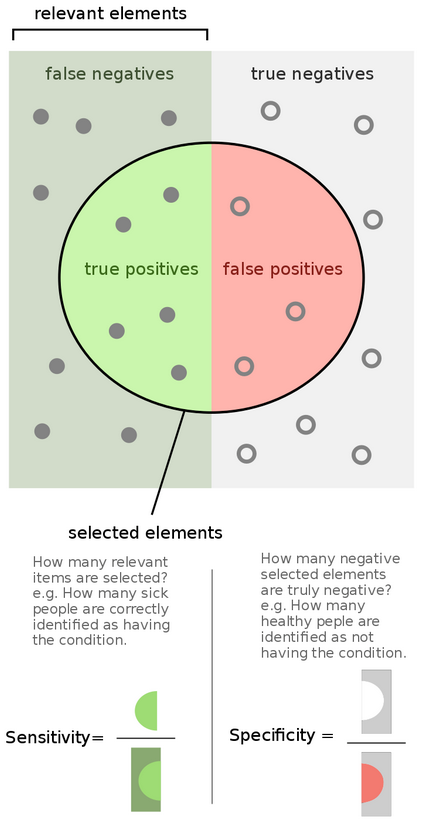

In [34]:
from IPython.display import Image
Image("img/sensitivity.png")

Рассмотрим случай бинарной классификации.

Будем использовать следующие обозначения:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- True Positive (TP) - количество верно предсказанных значений 1 класса
- False Positive (FP) - количество неверно предсказанных значений 1 класса (предсказана 1 но истинное значение 0) - ошибка I рода, «ложное срабатывание».
- True Negative (TN) - количество верно предсказанных значений 0 класса
- False Negative (FN) - количество неверно предсказанных значений 0 класса (предсказан 0 но истинное значение 1) - ошибка II рода, «пропуск цели, пропуск события».

В случае бинарной классификации матрица ошибок выглядит следующим образом:

| Предсказанное/истинное значение | $y=1$ | $y=0$ |
| --- | --- | --- |
| $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |

Для построения матрицы будем использовать функцию [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) из библиотеки scikit-learn.

Функция confusion_matrix выводит строки и столбцы таблицы в другом порядке:

| Истинное/предсказанное значение | $\hat{y}=0$ | $\hat{y}=1$ |
| --- | --- | --- |
| $y=0$ | True Negative (TN) | False Positive (FP) |
| $y=1$ | False Negative (FN) | True Positive (TP) |


In [35]:
confusion_matrix(bin_iris_y_test, bin_target1_1, labels=[0, 1])

array([[48,  0],
       [ 6, 21]], dtype=int64)

In [36]:
tn, fp, fn, tp = confusion_matrix(bin_iris_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(48, 0, 6, 21)

In [37]:
# Пример для небинарной классификации
confusion_matrix(iris_y_test, target1_1, labels=[0, 1, 2])

array([[24,  0,  0],
       [ 0, 24,  0],
       [ 0,  6, 21]], dtype=int64)

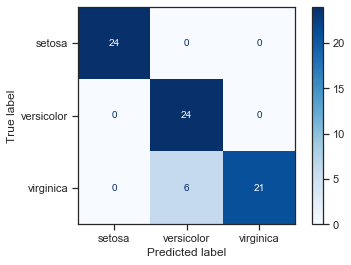

In [38]:
plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, cmap=plt.cm.Blues)

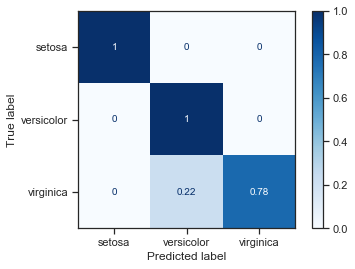

In [39]:
plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

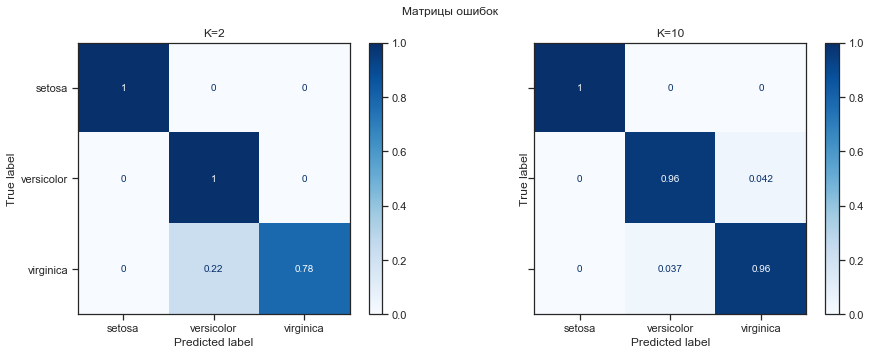

In [40]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

### 3) Precision, recall и F-мера

В случае бинарной классификации матрица ошибок выглядит следующим образом:

| Предсказанное/истинное значение | $y=1$ | $y=0$ |
| --- | --- | --- |
| $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика accuracy:

Уже знакомая метрика accuracy может быть записана с помощью следующей формулы:

$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Доля верно предсказанных классификатором положительных и отрицательных объектов.

In [41]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_1), recall_score(bin_iris_y_test, bin_target1_1)

(1.0, 0.7777777777777778)

In [42]:
# Для 10 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_2), recall_score(bin_iris_y_test, bin_target1_2)

(0.9629629629629629, 0.9629629629629629)

Параметр average (уровень детализации метрик) описан в документации к функциям. Рассмотрим данный параметр на примере 

In [43]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(iris_y_test, target1_1, average='micro')

0.92

In [44]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(iris_y_test, target1_1, average='macro')

0.9333333333333332

In [45]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(iris_y_test, target1_1, average='weighted')

0.936

#### F-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

Для обощенного случая используется [fbeta_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score)

Параметр average используется как в случае с precision и recall.

In [46]:
f1_score(bin_iris_y_test, bin_target1_2)

0.9629629629629629

In [47]:
f1_score(iris_y_test, target1_1, average='micro')

0.92

In [48]:
f1_score(iris_y_test, target1_1, average='macro')

0.9212962962962963

In [49]:
f1_score(iris_y_test, target1_1, average='weighted')

0.9194444444444446

Функция [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) позволяет выводить значения точности, полноты и F-меры для всех классов выборки.

In [50]:
classification_report(iris_y_test, target1_1, 
                      target_names=iris.target_names, output_dict=True)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24},
 'versicolor': {'precision': 0.8,
  'recall': 1.0,
  'f1-score': 0.888888888888889,
  'support': 24},
 'virginica': {'precision': 1.0,
  'recall': 0.7777777777777778,
  'f1-score': 0.8750000000000001,
  'support': 27},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.9333333333333332,
  'recall': 0.9259259259259259,
  'f1-score': 0.9212962962962963,
  'support': 75},
 'weighted avg': {'precision': 0.936,
  'recall': 0.92,
  'f1-score': 0.9194444444444446,
  'support': 75}}

### 4) [ROC-кривая и ROC AUC](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)

Используется для оценки качества бинарной классификации.

[Детальная статья в википедии.](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

Для получения точек графика используется функция [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve).

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

In [51]:
fpr, tpr, thresholds = roc_curve(bin_iris_y_test, bin_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0., 0., 1.]),
 array([0.        , 0.77777778, 1.        ]),
 array([2, 1, 0]))

In [52]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

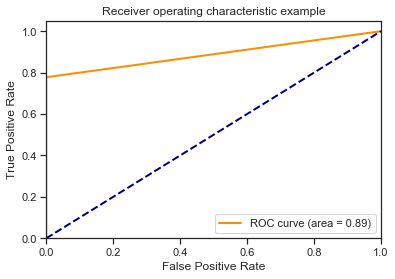

In [53]:
# Для 2 ближайших соседей
draw_roc_curve(bin_iris_y_test, bin_target1_1, pos_label=1, average='micro')

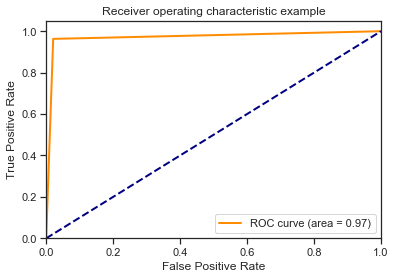

In [54]:
# Для 10 ближайших соседей
draw_roc_curve(bin_iris_y_test, bin_target1_2, pos_label=1, average='micro')

##### Дополнительные ссылки:
- [Задачки про AUC (ROC) - блог Александра Дьяконова](https://dyakonov.org/2015/10/09/%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%BA%D0%B8-%D0%BF%D1%80%D0%BE-auc-roc/)
- [Интерактивная визуализация](http://www.navan.name/roc/)

### 5) Кривая precision-recall

Аналогично ROC-кривой также можно строить кривую precision-recall. Обычно ее используют в случае сильного дисбаланса классов.

Детальный пример [из библиотеки.](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

Связь между характеристиками ROC и PR детально описана [в этой статье.](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)

## Изучение качества регрессии

**Решение задачи регрессии - это предсказание значений количественного (действительного) признака.**

### Подготовка данных и построение базовых моделей для оценки

Будем использовать набор данных "Стоимость недвижимости в Бостоне".

In [55]:
# https://scikit-learn.org/stable/datasets/index.html#boston-dataset
boston = load_boston()

In [56]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [57]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [58]:
# Сформируем DataFrame
boston_df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= list(boston['feature_names']) + ['target'])

In [59]:
# И выведем его статистические характеристики
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [60]:
# Разделение данных на обучающую и тестовую выборки
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston.data, boston.target, test_size=0.3, random_state=1)

In [61]:
# Размер обучающей выборки
boston_X_train.shape, boston_y_train.shape

((354, 13), (354,))

In [62]:
# Размер тестовой выборки
boston_X_test.shape, boston_y_test.shape

((152, 13), (152,))

In [63]:
# 2 ближайших соседа
reg1_1 = KNeighborsRegressor(n_neighbors=2)
reg1_1.fit(boston_X_train, boston_y_train)
target2_1 = reg1_1.predict(boston_X_test)
len(target2_1), target2_1

(152, array([26.4 , 28.4 , 18.  , 19.15, 33.05, 17.3 , 40.4 , 15.1 , 22.35,
        25.05, 24.1 , 27.65, 22.  , 33.95, 17.6 , 32.1 , 12.  , 34.65,
        23.95, 13.7 , 20.95, 18.8 , 22.2 , 21.6 , 30.25, 11.05, 13.55,
        17.3 , 42.65, 13.7 , 33.4 , 19.05, 41.95, 15.1 , 21.1 , 21.05,
        15.7 , 26.05, 11.15, 22.9 , 22.2 , 21.4 , 22.2 , 19.  , 17.8 ,
        12.95, 50.  , 13.95, 21.6 , 14.35, 21.15, 22.65, 18.6 , 17.2 ,
        12.1 , 21.35, 14.4 , 20.45, 18.  , 28.  , 15.7 , 28.45, 14.1 ,
        14.2 , 18.9 , 43.1 , 28.3 , 22.  , 24.65, 32.8 , 26.65,  9.35,
        15.7 , 17.4 , 19.75, 20.9 , 20.95, 22.75, 45.65, 40.4 , 18.15,
        20.65, 31.25, 13.  , 24.3 , 26.05, 15.7 , 23.65, 18.6 , 16.65,
        22.5 , 42.65, 17.65, 19.3 , 12.3 , 16.95, 20.15, 22.85, 26.3 ,
        21.3 , 16.25, 15.1 , 24.95, 24.9 , 13.8 , 21.1 , 13.45, 18.8 ,
        43.1 , 22.5 , 22.85, 25.75, 15.2 , 36.9 , 39.45, 30.15, 20.05,
        14.35, 40.4 , 26.75, 20.85, 13.4 , 24.95, 15.3 , 21.3 , 18.6 ,
 

In [64]:
# 10 ближайших соседей
reg1_2 = KNeighborsRegressor(n_neighbors=10)
reg1_2.fit(boston_X_train, boston_y_train)
target2_2 = reg1_2.predict(boston_X_test)
len(target2_2), target2_2

(152, array([29.32, 29.37, 21.51, 26.76, 24.53, 16.83, 35.81, 19.21, 21.12,
        25.75, 21.75, 29.37, 18.03, 27.28, 19.97, 23.86, 18.89, 26.81,
        27.28, 21.38, 22.76, 17.12, 21.56, 26.54, 27.28, 12.74, 17.34,
        20.98, 28.8 , 13.01, 29.09, 20.94, 36.96, 15.86, 21.16, 21.3 ,
        19.63, 22.76, 18.41, 21.04, 25.  , 21.56, 25.25, 17.66, 17.54,
        12.22, 30.72, 12.78, 17.74, 16.06, 22.43, 23.  , 25.9 , 18.15,
        17.58, 22.84, 19.71, 21.62, 21.18, 26.2 , 17.73, 22.32, 13.96,
        11.74, 26.27, 32.15, 26.77, 20.31, 23.53, 24.43, 26.58,  9.2 ,
        19.63, 23.18, 19.96, 21.68, 20.37, 23.26, 27.43, 35.81, 16.96,
        18.56, 25.83, 12.87, 23.86, 29.92, 17.66, 27.74, 20.16, 16.96,
        23.09, 28.81, 15.59, 22.77, 12.9 , 21.73, 23.91, 25.23, 28.14,
        20.89, 12.67, 14.73, 23.78, 24.68, 10.56, 20.89, 12.74, 24.21,
        32.51, 20.14, 25.71, 22.93, 12.87, 29.32, 28.34, 25.76, 21.39,
        20.51, 34.18, 27.07, 25.  , 12.74, 23.78, 25.  , 23.85, 20.49,
 

## Метрики качества регрессии

### 1) [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

In [65]:
mean_absolute_error(boston_y_test, target2_1)

4.271710526315789

In [66]:
mean_absolute_error(boston_y_test, target2_2)

4.4740789473684215

### 2) [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

In [67]:
mean_squared_error(boston_y_test, target2_1)

42.8475

In [68]:
mean_squared_error(boston_y_test, target2_2)

45.713972368421054

### 3) Median absolute error

$MedAE(y,\hat{y}) = median( \lvert  y_1 - \hat{y_1} \rvert, \dots, \lvert  y_N - \hat{y_N} \rvert)$

Метрика интересна тем, что является устойчивой к выбросам в данных.

Вычисляется с помощью функции [median_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error)

In [69]:
median_absolute_error(boston_y_test, target2_1)

2.8000000000000007

In [70]:
median_absolute_error(boston_y_test, target2_2)

2.869999999999999

### 4) [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [71]:
r2_score(boston_y_test, target2_1)

0.532510612902025

In [72]:
r2_score(boston_y_test, target2_2)

0.5012358498319173

##### [Замечания (с использованием вики-статьи)](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8#%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D1%80%D0%B5%D1%82%D0%B0%D1%86%D0%B8%D1%8F) 

Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %). Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими (коэффициент корреляции превышает 90 %). Значение коэффициента детерминации 1 означает функциональную зависимость между переменными.

Основная проблема применения (выборочного) $R^2$ заключается в том, что его значение увеличивается (не уменьшается) от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют! Поэтому сравнение моделей с разным количеством факторов с помощью коэффициента детерминации, вообще говоря, некорректно. Для этих целей можно использовать альтернативные показатели. 

# Дополнительные ссылки
- [Метрики в задачах машинного обучения](https://habr.com/ru/company/ods/blog/328372/)
- [Е. Соколов. Семинары по выбору моделей](http://www.machinelearning.ru/wiki/images/1/1c/Sem06_metrics.pdf)